In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import xarray as xr

#### Load Data (mm filepaths)

In [2]:
#lidar data (clipped, downscaled [50m], 2013-2016)
lidar_path = '/Users/megmason/research/sierra/data/depths_13-16_50m_downscale_clipped/*.nc'
flist = glob.glob(lidar_path)

#dem (50m)
d_path = '/Users/megmason/research/sierra/data/basedata/dem_clipped_downscale.nc'
#aspect (50m)
a_path = '/Users/megmason/research/sierra/data/basedata/aspect_clipped_downscale.nc'
#slope (50m)
s_path = '/Users/megmason/research/sierra/data/basedata/slope_clipped_downscale.nc'


#### Load Data (ars filepaths)

In [ ]:
# path = ''

#### Create Xarray

In [3]:
# create xarray Dataset (multiple netCDF files)
ds=xr.open_mfdataset(flist, concat_dim='time') #adds 'time' label, # is how many flights
ds.dims #dimention names of each axis
# ds.var
ds.coords # dict-like container of arrays that label each point (e.g 1D array, dt object, str)
# ds.info
# ds.Band1.shape
# ds['time']

# hgt = xr.open_dataset
# da_d = xr.open_dataset
# da_a = 
# da_s = 

Coordinates:
  * x        (x) float64 2.54e+05 2.541e+05 2.541e+05 ... 3.066e+05 3.067e+05
  * y        (y) float64 4.179e+06 4.179e+06 4.179e+06 ... 4.23e+06 4.23e+06

#### Set Time Variable

In [4]:
date=[]

for f in sorted(flist):
#     print(f)
    dt_str = f.split("/")[-1] #splits on / and saves the last one
    dt_str = "".join([c for c in dt_str if c.isnumeric()]) #grabs numeric values
    dt = pd.to_datetime(dt_str[:8]) #convert to datetime, grabs digits for dates only
#     print('file:',dt.date())
    date.append(dt.date())

time_var = pd.to_datetime(date)
ds['DATE'] = (['time'], time_var)
ds = ds.assign_coords(time=ds.DATE)
# ds.sel(time='2015')
d = ds.sel(time='2015')
d

<xarray.Dataset>
Dimensions:              (time: 10, x: 1054, y: 1007)
Coordinates:
  * x                    (x) float64 2.54e+05 2.541e+05 ... 3.066e+05 3.067e+05
  * y                    (y) float64 4.179e+06 4.179e+06 ... 4.23e+06 4.23e+06
  * time                 (time) datetime64[ns] 2015-02-18 ... 2015-06-08
Data variables:
    Band1                (time, y, x) float64 dask.array<shape=(10, 1007, 1054), chunksize=(1, 1007, 1054)>
    transverse_mercator  (time) |S1 b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
    DATE                 (time) datetime64[ns] 2015-02-18 ... 2015-06-08
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 2.2.3, released 2017/11/20
    history:      Thu Jul 18 17:52:24 2019: GDAL Create( /home/meganmason/Doc...

#### testing below!

<class 'xarray.core.dataset.Dataset'>
(11, 1007, 1054)


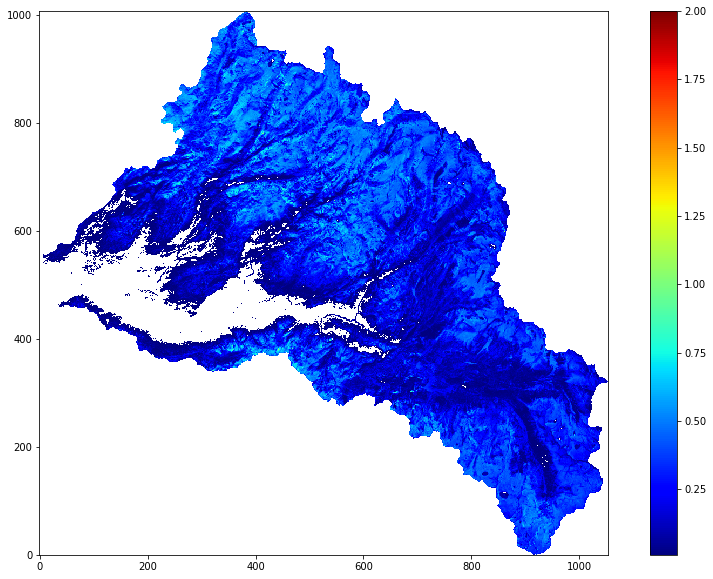

In [5]:
# std by year (can select by year since I made assigned coord to ds with dtype:datetime)

d = ds.sel(time='2014')
print(type(d))
print(d.Band1.shape)
vd = d.Band1.std(dim='time')
vd = np.where(vd>.001, vd, np.nan)
fig = plt.figure(figsize=(15, 10))
plt.imshow(vd, origin='lower', cmap='jet', vmin=.01, vmax=2.0)
plt.colorbar()
plt.show()


# plt.title('snow depth [50m] variance, 2013-2016')
# plt.colorbar()# plt.savefig('figs/var_13-16', dpi=600)

In [ ]:
# d = ds.sel(time='2014')
# da=d.to_array(dim='variable')

# da = ds.to_array(dim='DATE')
da

# print(d.Band1.shape)
# vd = d.Band1.std(dim='time')
# vd = np.where(vd>.001, vd, np.nan)
# fig = plt.figure(figsize=(15, 10))

# d.plot.hist(d.Band1)
# # plt.hist(vd, origin='lower', cmap='jet', vmin=.01, vmax=2.0)
# # plt.colorbar()
# plt.show()

In [ ]:
# flat_hgt = hgt['Band1'].values.flatten() #flat_hgt.shape

dd = ds['Band1'].values.flatten()
print(dd.shape)